In [1]:
import torch
import jax
from torch.utils.data import DataLoader
from torchvision import transforms
from tiny_imagenet_torch import TinyImageNet ## Import allow TinyImage via torch methods(64x64)

In [2]:
#Confirm cuda is enabled on both jax and torch
print(torch.cuda.is_available())
print(jax.devices())


True
[CudaDevice(id=0)]


In [3]:

# Simple transformation - just convert to tensor
transform = transforms.ToTensor()

# Create dataset
train_dataset = TinyImageNet(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = TinyImageNet(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=0)

In [5]:
import equinox as eqx
import jax.random as jrandom
eqx.clear_caches()

In [6]:
SEED =42
key = jrandom.PRNGKey(SEED)

In [7]:
from model import *
from train import *
import optax
from optax import contrib


#

total_epoch = 10


optimizer = optax.adamw(learning_rate=1e-4,weight_decay=1e-5)

In [8]:
# Resnet 18 w/ Residuals
Resnet18, state = eqx.nn.make_with_state(ResNet)(3, 200, (2,2,2,2), ResBasicBlock, key)
params = eqx.filter(Resnet18, eqx.is_inexact_array)
count_params(params)
opt_state = optimizer.init(params)
# in your loop


Resnet18,state,opt_state,full_train_loss,eval_loss_epochs,eval_acc_epochs=train_and_log(Resnet18,state,opt_state,optimizer,train_loader,test_loader,total_epoch,)


steps,train_losses = zip(*full_train_loss)
epochs, val_losses = zip(*eval_loss_epochs)
_, val_accs = zip(*eval_acc_epochs)

Model # of parameters: 11.64M
Epoch 001 | train_loss(step 391): 4.1591 | val_loss: 6.3289 | val_acc: 1.36%
Epoch 002 | train_loss(step 782): 3.5020 | val_loss: 3.6669 | val_acc: 19.23%
Epoch 003 | train_loss(step 1173): 3.0625 | val_loss: 3.6103 | val_acc: 20.75%
Epoch 004 | train_loss(step 1564): 2.8668 | val_loss: 3.6753 | val_acc: 20.37%
Epoch 005 | train_loss(step 1955): 2.4918 | val_loss: 3.5552 | val_acc: 23.07%
Epoch 006 | train_loss(step 2346): 1.7242 | val_loss: 3.8188 | val_acc: 21.20%
Epoch 007 | train_loss(step 2737): 1.0762 | val_loss: 3.9804 | val_acc: 20.77%
Epoch 008 | train_loss(step 3128): 0.7633 | val_loss: 3.9057 | val_acc: 23.14%
Epoch 009 | train_loss(step 3519): 0.3250 | val_loss: 4.0956 | val_acc: 22.33%
Epoch 010 | train_loss(step 3910): 0.0859 | val_loss: 4.0823 | val_acc: 23.97%


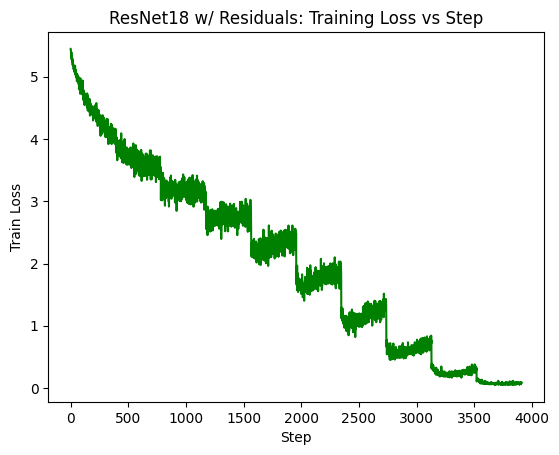

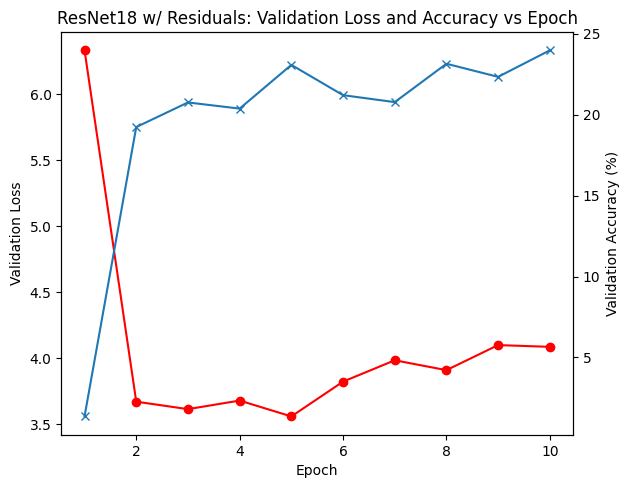

In [9]:

plot_training_and_validation(steps, train_losses, epochs, val_losses, val_accs,"ResNet18 w/ Residuals")


Model # of parameters: 11.64M
Epoch 001 | train_loss(step 391): 4.3793 | val_loss: 5.9314 | val_acc: 1.04%
Epoch 002 | train_loss(step 782): 3.7543 | val_loss: 3.9519 | val_acc: 14.29%
Epoch 003 | train_loss(step 1173): 3.5133 | val_loss: 3.8244 | val_acc: 15.71%
Epoch 004 | train_loss(step 1564): 3.1629 | val_loss: 3.7140 | val_acc: 18.24%
Epoch 005 | train_loss(step 1955): 2.7305 | val_loss: 3.6890 | val_acc: 19.15%
Epoch 006 | train_loss(step 2346): 2.5625 | val_loss: 3.4036 | val_acc: 24.42%
Epoch 007 | train_loss(step 2737): 2.3322 | val_loss: 3.6254 | val_acc: 22.00%
Epoch 008 | train_loss(step 3128): 2.0894 | val_loss: 3.6892 | val_acc: 22.22%
Epoch 009 | train_loss(step 3519): 2.0030 | val_loss: 3.8506 | val_acc: 21.46%
Epoch 010 | train_loss(step 3910): 1.5242 | val_loss: 4.0131 | val_acc: 21.46%


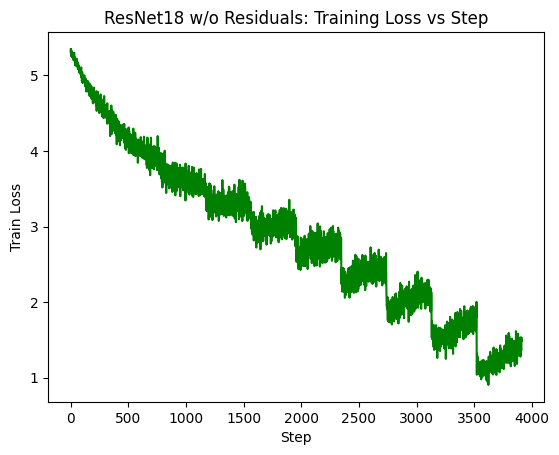

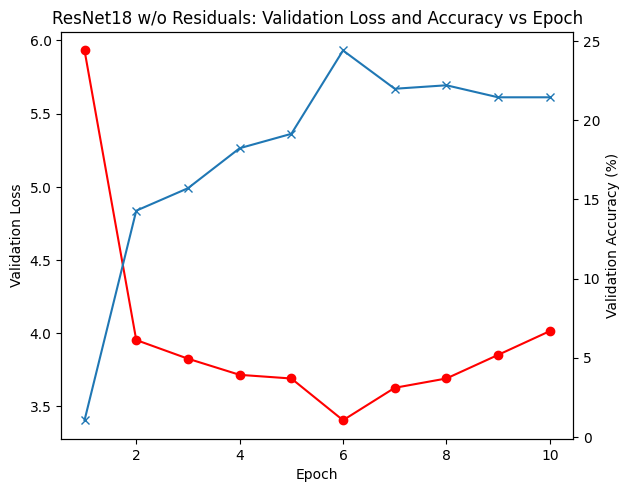

In [10]:


Resnet18_No_Res, state = eqx.nn.make_with_state(ResNet)(3, 200, (2,2,2,2), BasicBlock, key)
params = eqx.filter(Resnet18_No_Res, eqx.is_inexact_array)
count_params(params)
# optimizer = optax.adamw(3e-4)
opt_state = optimizer.init(params)
# in your loop


Resnet18_No_Res,state,opt_state,full_train_loss,eval_loss_epochs,eval_acc_epochs=train_and_log(Resnet18_No_Res,state,opt_state,optimizer,train_loader,test_loader,total_epoch)


steps,train_losses = zip(*full_train_loss)
epochs, val_losses = zip(*eval_loss_epochs)
_, val_accs = zip(*eval_acc_epochs)
plot_training_and_validation(steps, train_losses, epochs, val_losses, val_accs,"ResNet18 w/o Residuals")








Model # of parameters: 38.53M
Epoch 001 | train_loss(step 391): 5.0470 | val_loss: 5.6538 | val_acc: 0.50%
Epoch 002 | train_loss(step 782): 4.4104 | val_loss: 4.5820 | val_acc: 6.66%
Epoch 003 | train_loss(step 1173): 4.3487 | val_loss: 4.4134 | val_acc: 8.83%
Epoch 004 | train_loss(step 1564): 4.0528 | val_loss: 4.3616 | val_acc: 10.21%
Epoch 005 | train_loss(step 1955): 3.9102 | val_loss: 4.2647 | val_acc: 11.75%
Epoch 006 | train_loss(step 2346): 3.5753 | val_loss: 4.2786 | val_acc: 12.16%
Epoch 007 | train_loss(step 2737): 3.3812 | val_loss: 4.2354 | val_acc: 13.48%
Epoch 008 | train_loss(step 3128): 3.0311 | val_loss: 4.3700 | val_acc: 12.58%
Epoch 009 | train_loss(step 3519): 2.9032 | val_loss: 4.5101 | val_acc: 12.60%
Epoch 010 | train_loss(step 3910): 2.5083 | val_loss: 4.6041 | val_acc: 12.81%


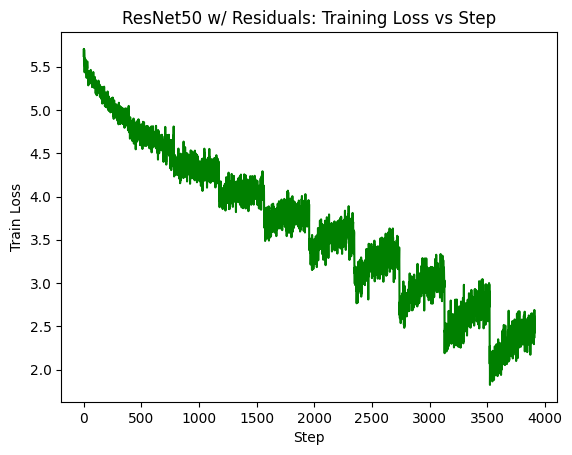

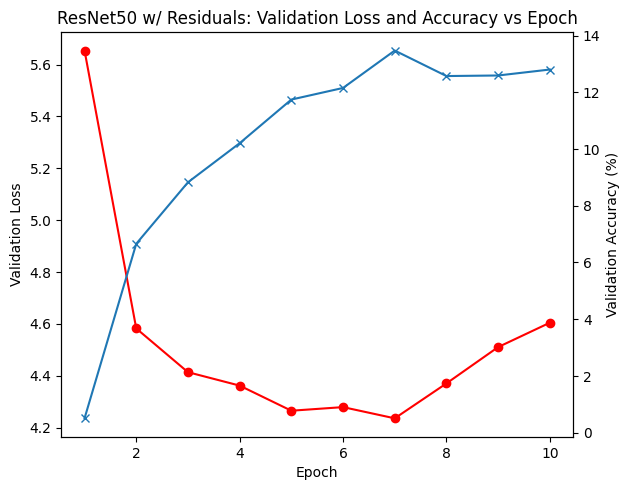

In [11]:


Resnet50, state = eqx.nn.make_with_state(ResNet)(3, 200, (3,4,6,3), ResBottleNeckBlock, key)
params = eqx.filter(Resnet50, eqx.is_inexact_array)
count_params(params)
# optimizer = optax.adamw(3e-4)
opt_state = optimizer.init(params)
# in your loop


Resnet50,state,opt_state,full_train_loss,eval_loss_epochs,eval_acc_epochs=train_and_log(Resnet50,state,opt_state,optimizer,train_loader,test_loader,total_epoch)


steps,train_losses = zip(*full_train_loss)
epochs, val_losses = zip(*eval_loss_epochs)
_, val_accs = zip(*eval_acc_epochs)
plot_training_and_validation(steps, train_losses, epochs, val_losses, val_accs,"ResNet50 w/ Residuals")









Model # of parameters: 38.53M
Epoch 001 | train_loss(step 391): 5.2472 | val_loss: 5.3171 | val_acc: 0.50%
Epoch 002 | train_loss(step 782): 5.2600 | val_loss: 5.2845 | val_acc: 0.91%
Epoch 003 | train_loss(step 1173): 5.2374 | val_loss: 5.2653 | val_acc: 0.88%
Epoch 004 | train_loss(step 1564): 5.2108 | val_loss: 5.2529 | val_acc: 0.93%
Epoch 005 | train_loss(step 1955): 5.2360 | val_loss: 5.2164 | val_acc: 1.10%
Epoch 006 | train_loss(step 2346): 5.1834 | val_loss: 5.4499 | val_acc: 1.01%
Epoch 007 | train_loss(step 2737): 5.1458 | val_loss: 5.2460 | val_acc: 1.31%
Epoch 008 | train_loss(step 3128): 4.9552 | val_loss: 5.2497 | val_acc: 1.57%
Epoch 009 | train_loss(step 3519): 5.0184 | val_loss: 5.1316 | val_acc: 2.43%
Epoch 010 | train_loss(step 3910): 4.9694 | val_loss: 5.1011 | val_acc: 2.57%


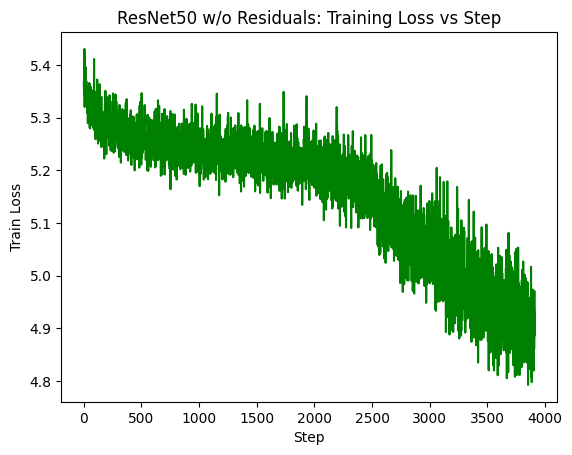

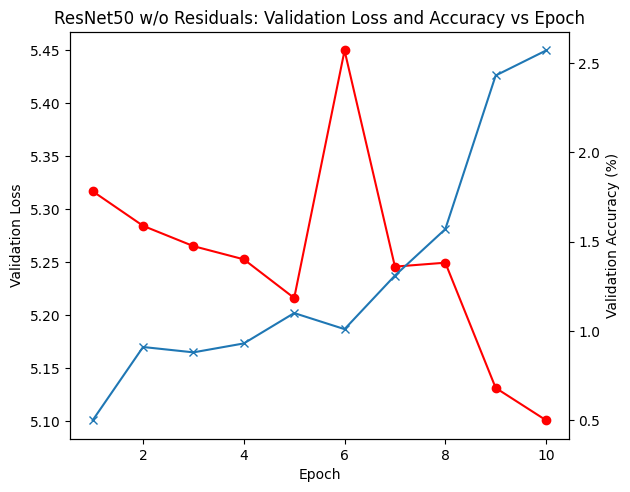

In [12]:

# init
Resnet50_no_Res, state = eqx.nn.make_with_state(ResNet)(3, 200, (3,4,6,3), BottleNeckBlock, key)
params = eqx.filter(Resnet50_no_Res, eqx.is_inexact_array)
count_params(params)
# optimizer = optax.adamw(3e-4)
opt_state = optimizer.init(params)
# in your loop


Resnet50_no_Res,state,opt_state,full_train_loss,eval_loss_epochs,eval_acc_epochs=train_and_log(Resnet50_no_Res,state,opt_state,optimizer,train_loader,test_loader,total_epoch)


steps,train_losses = zip(*full_train_loss)
epochs, val_losses = zip(*eval_loss_epochs)
_, val_accs = zip(*eval_acc_epochs)
plot_training_and_validation(steps, train_losses, epochs, val_losses, val_accs,"ResNet50 w/o Residuals")






